<a href="https://colab.research.google.com/github/ryegunde/KMeans_Clustering/blob/main/KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The purpose of this notebook is to develop intuition into the K-Means Clustering Algorithm

#First we will implement this model from scratch

The model works as following...
1. We pick the number of clusters we want K
2. We randomly select K mean values
3. We add each sample in our dataset to the closest mean
4. We calculate the new means based on these clusters
5. Repeat step 3 and on until the means no longer change

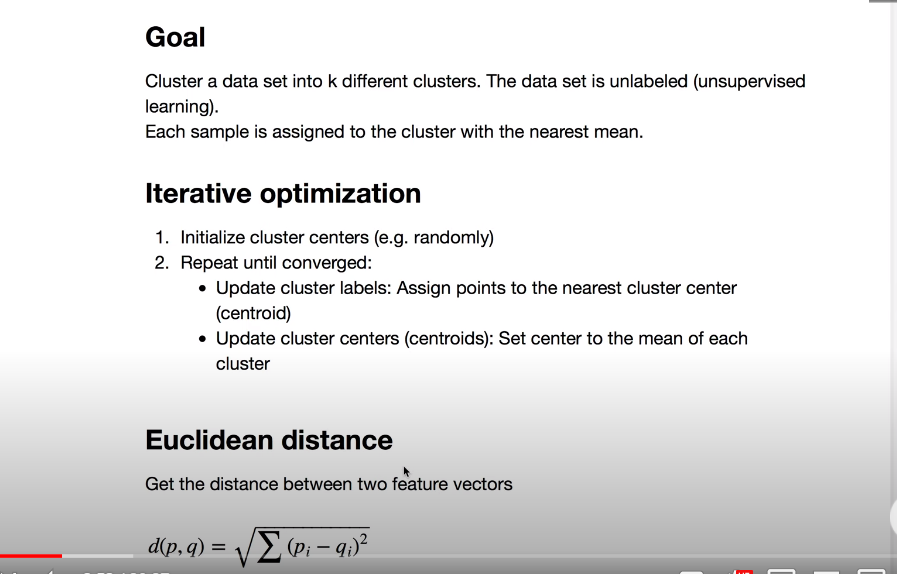

This implementation is based off https://youtu.be/vtuH4VRq1AU


In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

#This function returns the euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))


class KMeans2():

    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # initializes random samples as the centroids
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)
            
            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)                                      #unpacks point into x and y vectors which scatter takes in

        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)

        plt.show()

500 Samples
2 Dimensions
actual number of clusters:  4


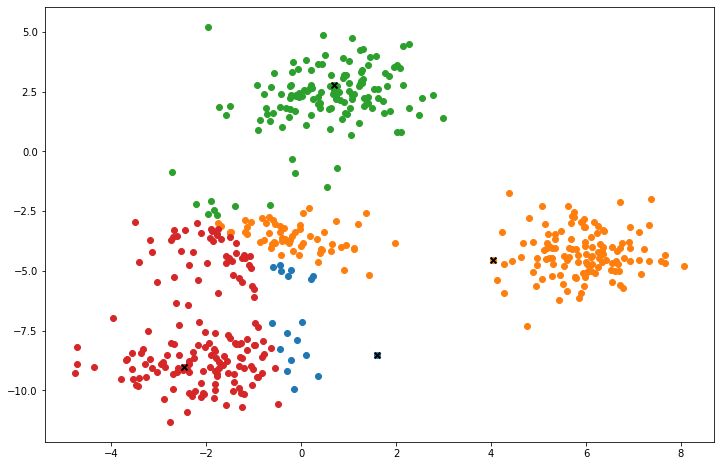

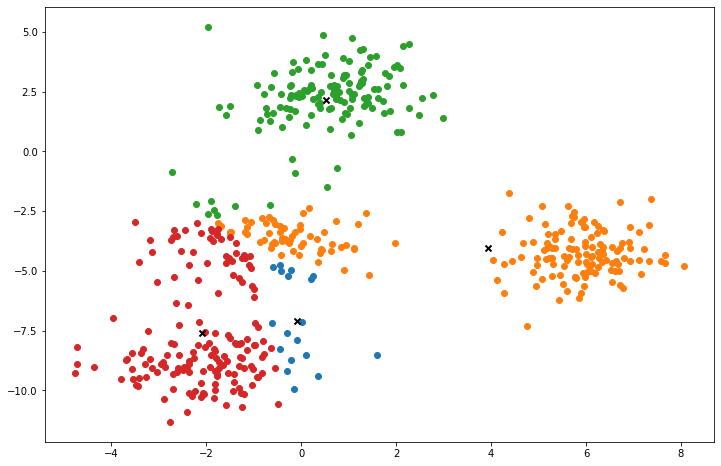

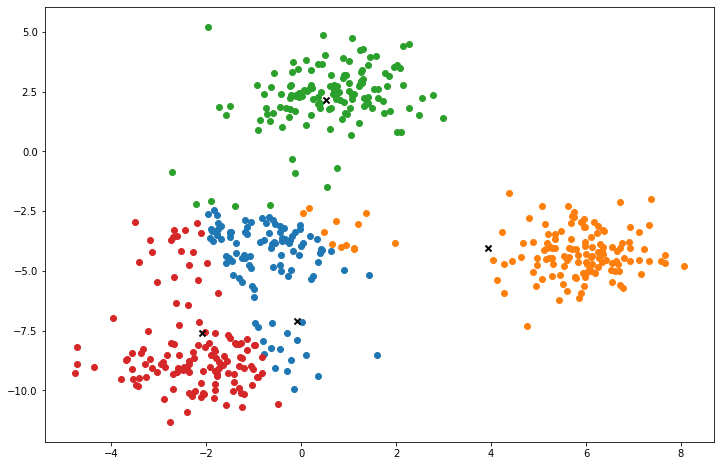

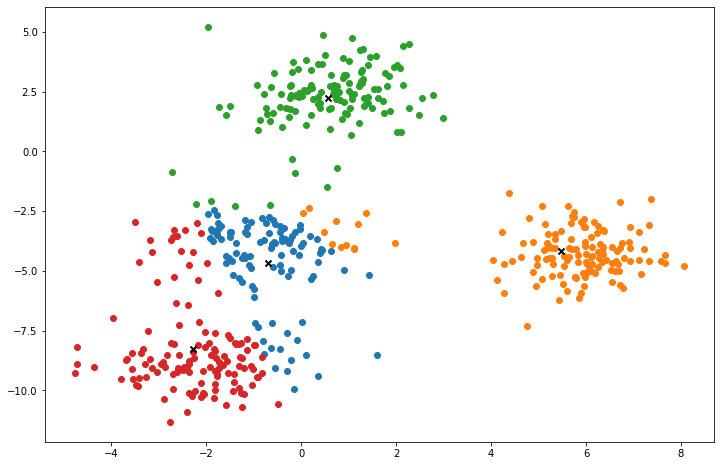

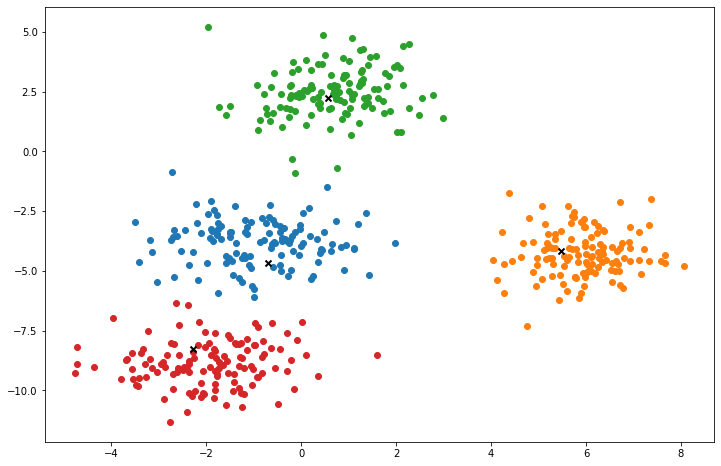

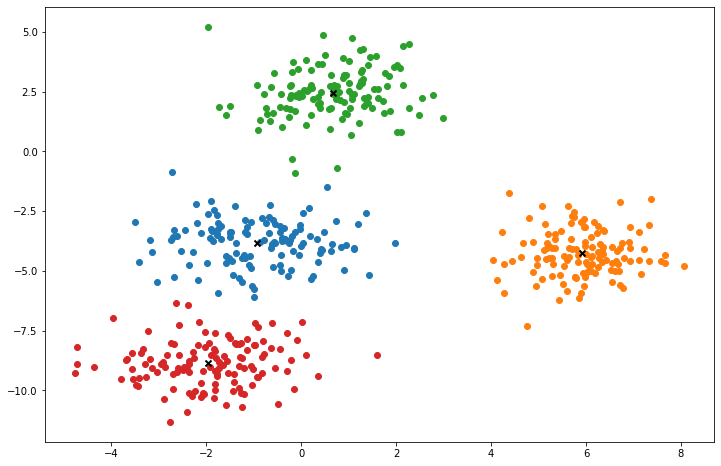

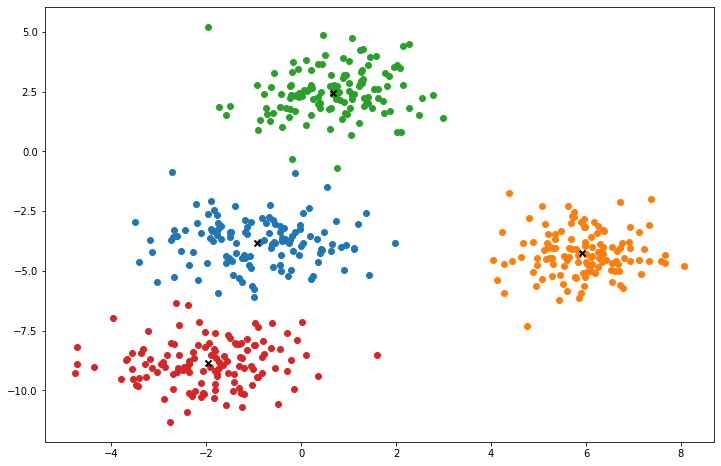

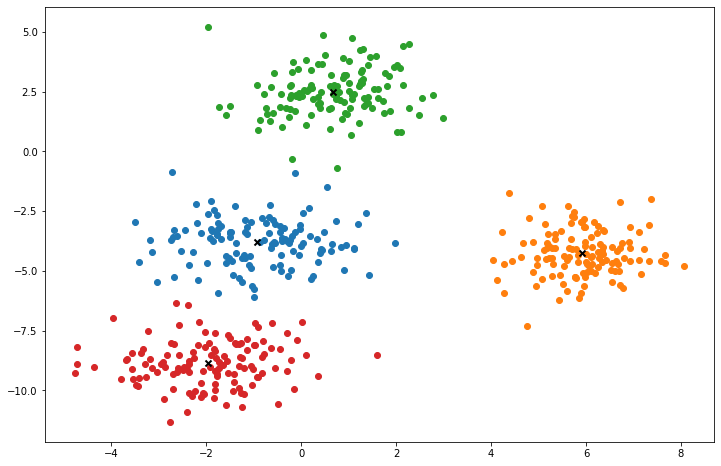

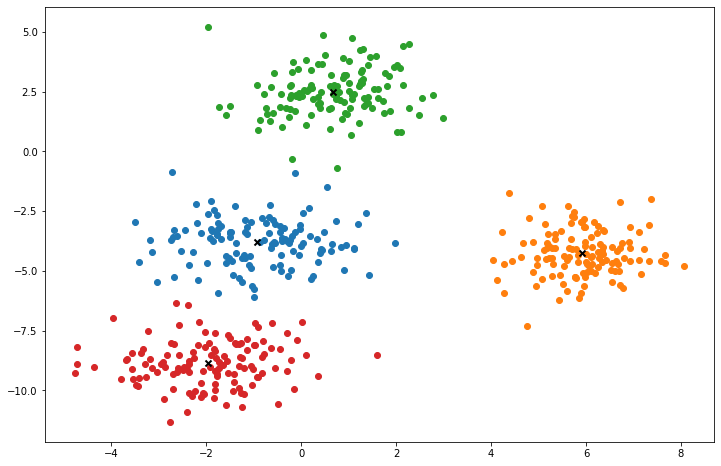

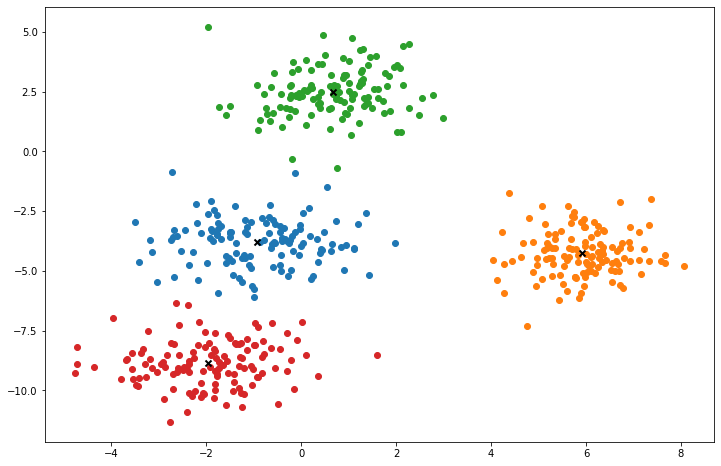

In [10]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

#Creates a dataset with 3 groupings, 500 samples, in two dimensions
X, y = make_blobs(centers=4, n_samples=500, n_features=2, shuffle=True, random_state=40)

n, d = X.shape
print(n, "Samples")
print(d, "Dimensions")
    
clusters = len(np.unique(y))
print("actual number of clusters: ", clusters)

k = KMeans2(K=clusters, max_iters=150, plot_steps=True)
y_pred = k.predict(X)

k.plot()

##Now we will use SKlearn's implementation 

In [6]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Creates a dataset with 3 groupings, 500 samples, in two dimensions
X, y = make_blobs(centers=4, n_samples=500, n_features=2, shuffle=True, random_state=40)

n, d = X.shape
print(n, "Samples")
print(d, "Dimensions")
    
clusters = len(np.unique(y))
print("actual number of clusters: ", clusters)

k = KMeans(n_clusters = clusters, max_iter=150)
k.fit(X)

k.predict(X)

500 Samples
2 Dimensions
actual number of clusters:  4


array([3, 2, 0, 1, 3, 2, 1, 0, 0, 1, 0, 0, 3, 0, 2, 2, 2, 0, 1, 0, 2, 3,
       3, 0, 1, 3, 0, 3, 3, 3, 0, 2, 3, 1, 3, 2, 3, 1, 2, 0, 1, 0, 2, 0,
       3, 1, 3, 1, 2, 2, 1, 0, 0, 1, 2, 3, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2,
       0, 3, 2, 1, 2, 2, 3, 1, 3, 0, 0, 1, 1, 1, 0, 3, 0, 2, 2, 2, 1, 2,
       0, 2, 3, 3, 1, 1, 3, 2, 1, 0, 3, 1, 2, 0, 0, 2, 2, 0, 3, 2, 0, 1,
       0, 1, 2, 1, 0, 2, 3, 0, 3, 3, 1, 1, 0, 0, 2, 0, 1, 0, 1, 2, 0, 1,
       0, 2, 0, 0, 2, 1, 1, 0, 1, 3, 2, 1, 3, 3, 0, 3, 3, 3, 3, 1, 0, 2,
       2, 3, 1, 3, 0, 0, 3, 2, 2, 3, 1, 0, 1, 3, 2, 2, 2, 0, 2, 2, 0, 0,
       0, 0, 2, 2, 2, 3, 0, 2, 1, 3, 0, 3, 0, 1, 2, 1, 0, 1, 3, 0, 0, 2,
       3, 2, 0, 3, 3, 2, 0, 1, 2, 1, 3, 3, 0, 0, 2, 0, 0, 2, 3, 2, 3, 1,
       2, 3, 1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 2, 0, 3, 1, 0, 2, 1, 0, 3,
       3, 3, 2, 3, 3, 1, 0, 2, 1, 3, 2, 1, 2, 1, 0, 2, 1, 2, 2, 1, 0, 1,
       1, 0, 3, 1, 2, 0, 3, 1, 3, 3, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 1, 3,
       2, 2, 2, 1, 3, 3, 0, 2, 3, 1, 0, 1, 3, 3, 2,